### Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("listings_newyork.csv")

In [3]:
data.shape[0]

39319

In [4]:
duplicates = data.duplicated().sum()
print("The number of duplicates are as :", duplicates)

The number of duplicates are as : 0


In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,816783428767938211,Cool studio 3 min from subway!,47125955,Rebeca,Queens,Long Island City,40.761327,-73.926758,Entire home/apt,110.0,30,9,2023-09-25,0.96,2,363,9,NaN
1,8686040,LARGE MANHATTAN ONE BEDROOM,45608786,Virginia,Manhattan,Inwood,40.859990,-73.928500,Entire home/apt,NaN,30,5,2015-11-22,0.05,1,0,0,NaN
2,12426778,TH BRKLYN,7963317,Rob,Brooklyn,Boerum Hill,40.688340,-73.986010,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
3,22671517,55 washington,3428456,Yoon,Brooklyn,DUMBO,40.701490,-73.988860,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
4,35776956,luxury apt in long lsland city \n1min to subway,221012726,Lyn,Queens,Long Island City,40.749010,-73.938980,Private room,NaN,30,1,2019-07-31,0.02,1,0,0,NaN


In [6]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,39319.0,3.354009e+17,4.272047e+17,2595.000000,2.042637e+07,4.731606e+07,7.920235e+17,1.106684e+18
host_id,39319.0,1.628209e+08,1.757040e+08,1678.000000,1.692691e+07,8.081323e+07,2.934481e+08,5.657054e+08
latitude,39319.0,4.072917e+01,5.633737e-02,40.500314,4.068888e+01,4.072637e+01,4.076265e+01,4.091138e+01
longitude,39319.0,-7.394664e+01,5.462219e-02,-74.251907,-7.398312e+01,-7.395437e+01,-7.392738e+01,-7.371365e+01
price,24277.0,2.052729e+02,9.933188e+02,8.000000,8.000000e+01,1.300000e+02,2.170000e+02,1.000000e+05
minimum_nights,39319.0,2.936713e+01,2.881487e+01,1.000000,3.000000e+01,3.000000e+01,3.000000e+01,1.250000e+03
number_of_reviews,39319.0,2.491811e+01,5.865430e+01,0.000000,0.000000e+00,4.000000e+00,2.100000e+01,1.897000e+03
reviews_per_month,27514.0,9.272767e-01,1.683886e+00,0.010000,1.000000e-01,3.400000e-01,1.240000e+00,8.603000e+01
calculated_host_listings_count,39319.0,4.861047e+01,1.515710e+02,1.000000,1.000000e+00,1.000000e+00,7.000000e+00,8.420000e+02
availability_365,39319.0,1.466824e+02,1.445897e+02,0.000000,0.000000e+00,9.500000e+01,2.880000e+02,3.650000e+02


In [8]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
print("\nPercentage of Missing Values:")
print(missing_percent[missing_percent > 0])

Columns with Missing Values:
name                     2
host_name                6
price                15042
last_review          11805
reviews_per_month    11805
license              34212
dtype: int64

Percentage of Missing Values:
name                  0.005087
host_name             0.015260
price                38.256314
last_review          30.023653
reviews_per_month    30.023653
license              87.011369
dtype: float64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39319 entries, 0 to 39318
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39319 non-null  int64  
 1   name                            39317 non-null  object 
 2   host_id                         39319 non-null  int64  
 3   host_name                       39313 non-null  object 
 4   neighbourhood_group             39319 non-null  object 
 5   neighbourhood                   39319 non-null  object 
 6   latitude                        39319 non-null  float64
 7   longitude                       39319 non-null  float64
 8   room_type                       39319 non-null  object 
 9   price                           24277 non-null  float64
 10  minimum_nights                  39319 non-null  int64  
 11  number_of_reviews               39319 non-null  int64  
 12  last_review                     

In [10]:
data["last_review"] = pd.to_datetime(data["last_review"])
data.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

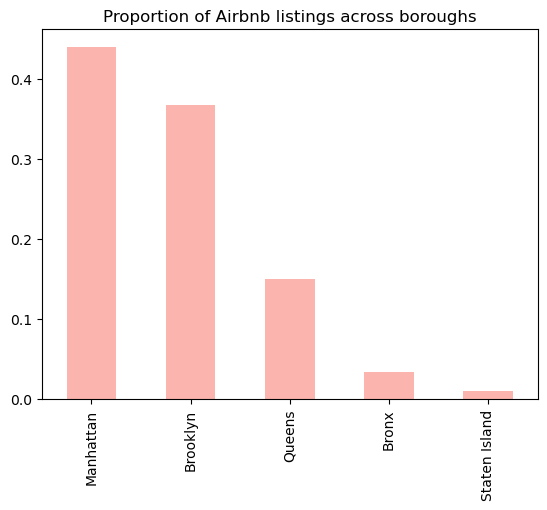

In [11]:
(data['neighbourhood_group'].value_counts() / data.shape[0]).plot(kind='bar', cmap='Pastel1')
plt.title('Proportion of Airbnb listings across boroughs')
plt.show()

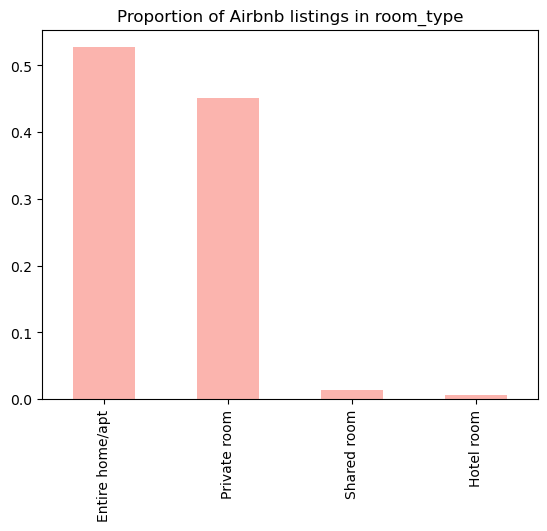

In [12]:
(data.room_type.value_counts()/data.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings in room_type')
plt.show()

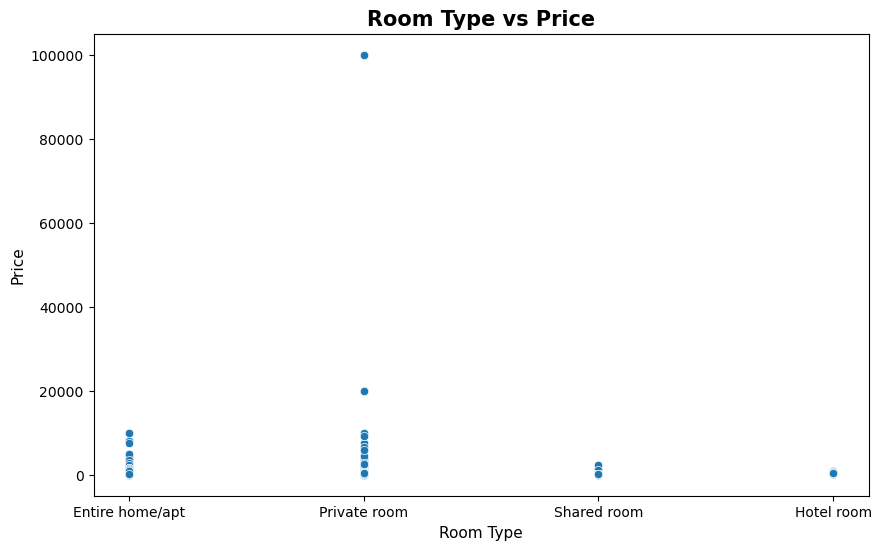

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='room_type', y='price', data=data)

plt.xlabel("Room Type", size=11)
plt.ylabel("Price", size=11)
plt.title("Room Type vs Price",size=15, weight='bold')
plt.show()

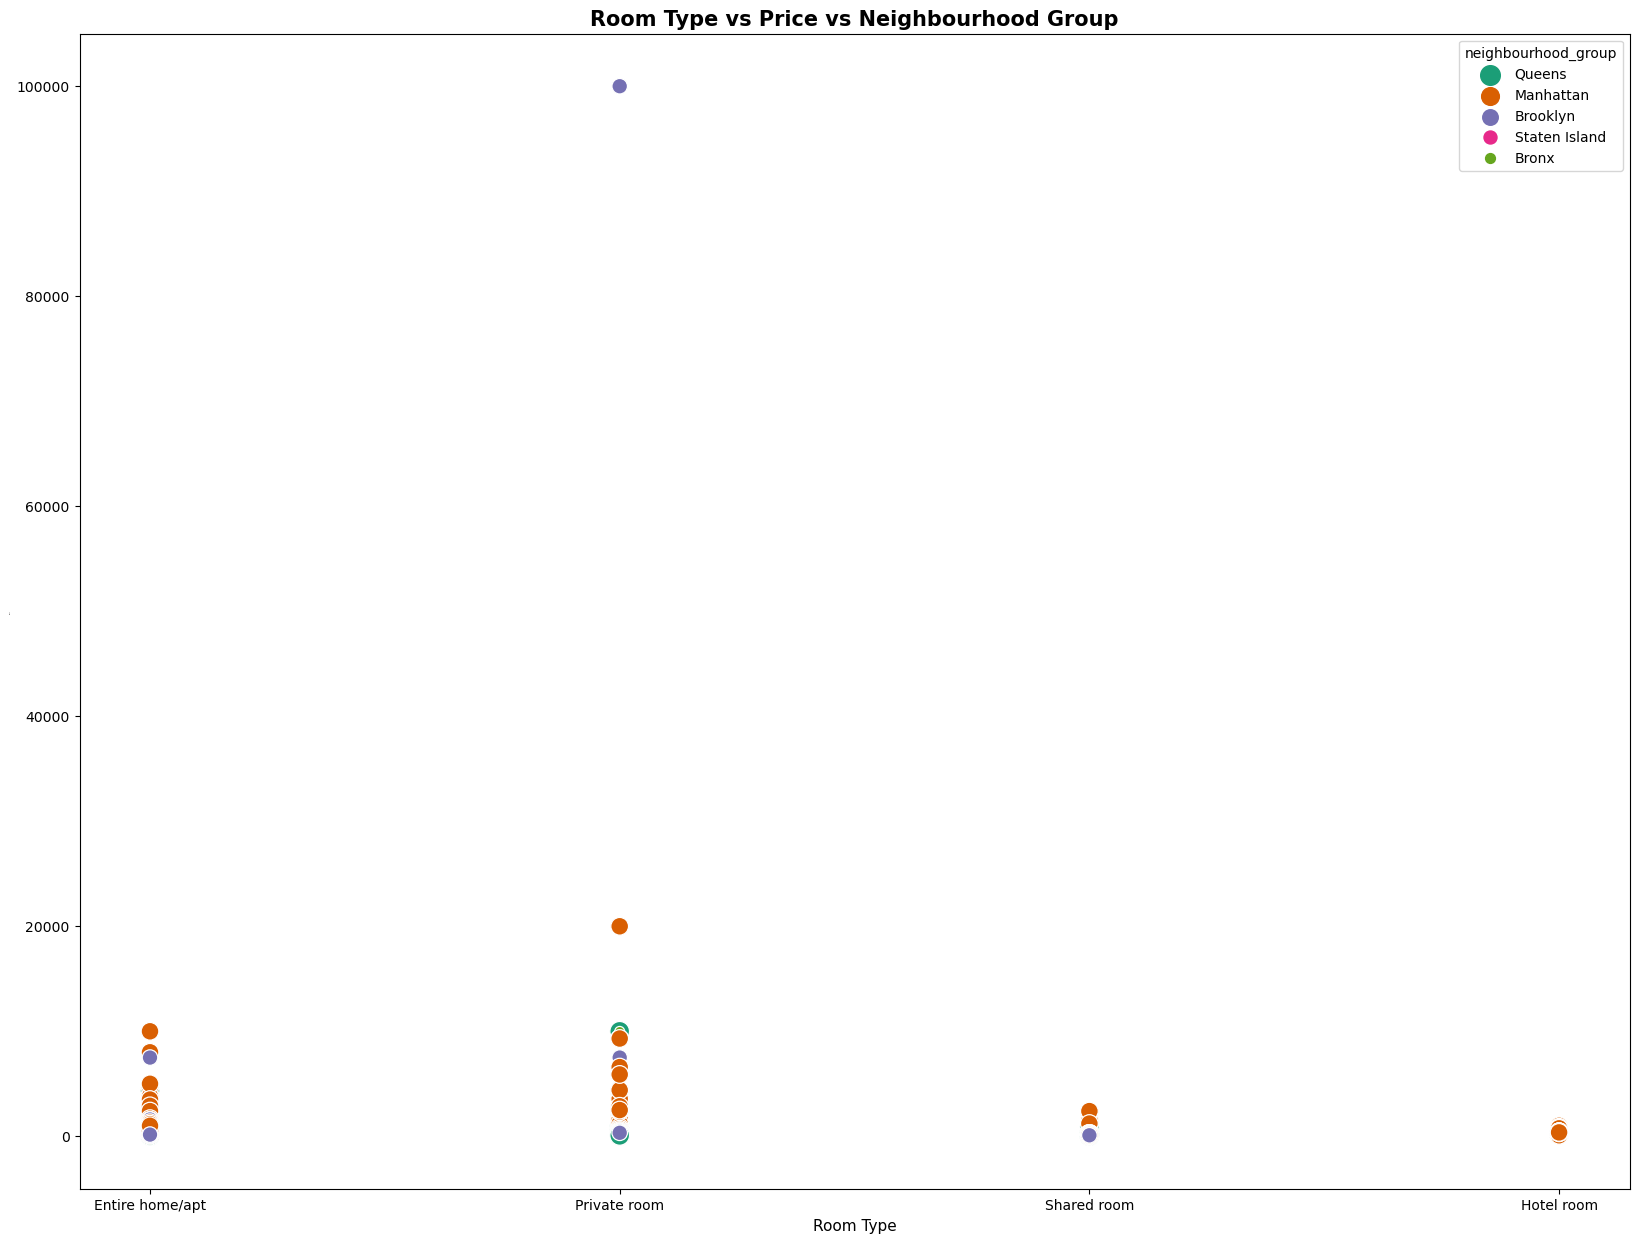

In [14]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=data)

plt.xlabel("Room Type", size=11)
plt.ylabel("Price", size=1)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')
plt.show()

In [15]:
pastel_palette = sns.color_palette("pastel")

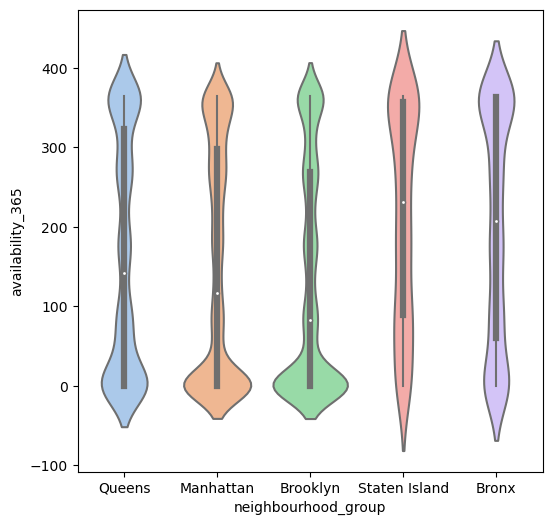

In [16]:
plt.figure(figsize=(6,6))
ax = sns.violinplot(data=data, x="neighbourhood_group", y="availability_365",palette=pastel_palette)
plt.show()

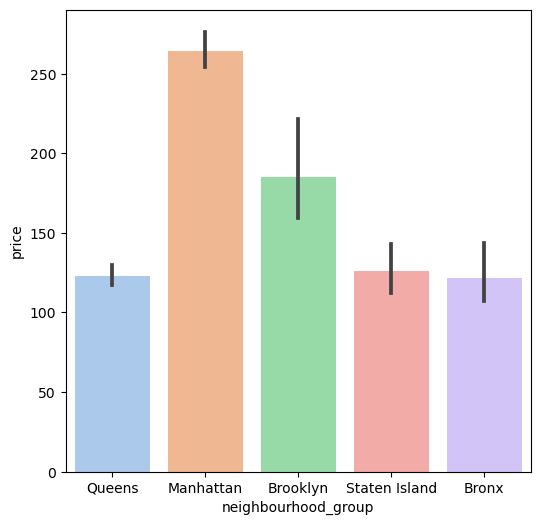

In [17]:
plt.figure(figsize=(6,6))
sns.barplot(data=data, x='neighbourhood_group', y='price', palette=pastel_palette)
plt.show()

C:\Users\ramsh\AppData\Local\Temp\ipykernel_2676\1309971411.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group',palette=pastel_palette)


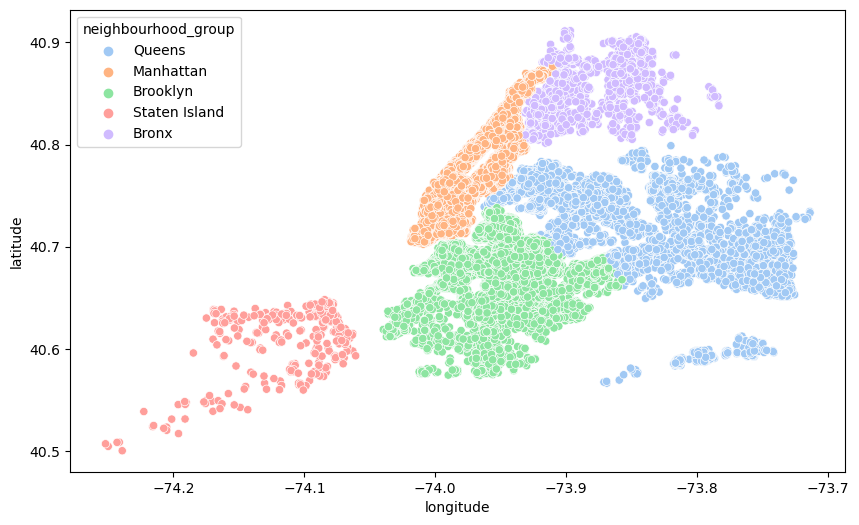

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group',palette=pastel_palette)
plt.ioff()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

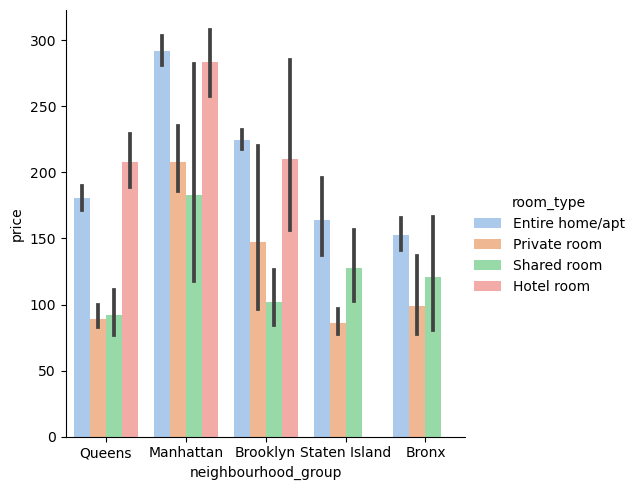

In [19]:
plt.figure(figsize=(12, 6))
sns.catplot(x='neighbourhood_group',y='price',data=data,kind='bar',hue='room_type',palette=pastel_palette)
plt.ioff()
plt.show()

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

def categorize(hotel_price):
    if hotel_price <= 75:
        return 'Low'
    elif 75 < hotel_price <= 500:
        return 'Medium'
    else:
        return 'High'

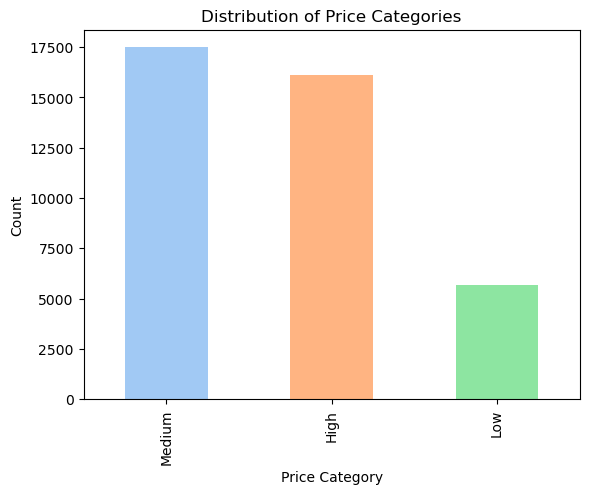

In [21]:
data['price'].apply(categorize).value_counts().plot(kind='bar',color=pastel_palette)
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.title('Distribution of Price Categories')
plt.show()

<Figure size 1000x600 with 0 Axes>

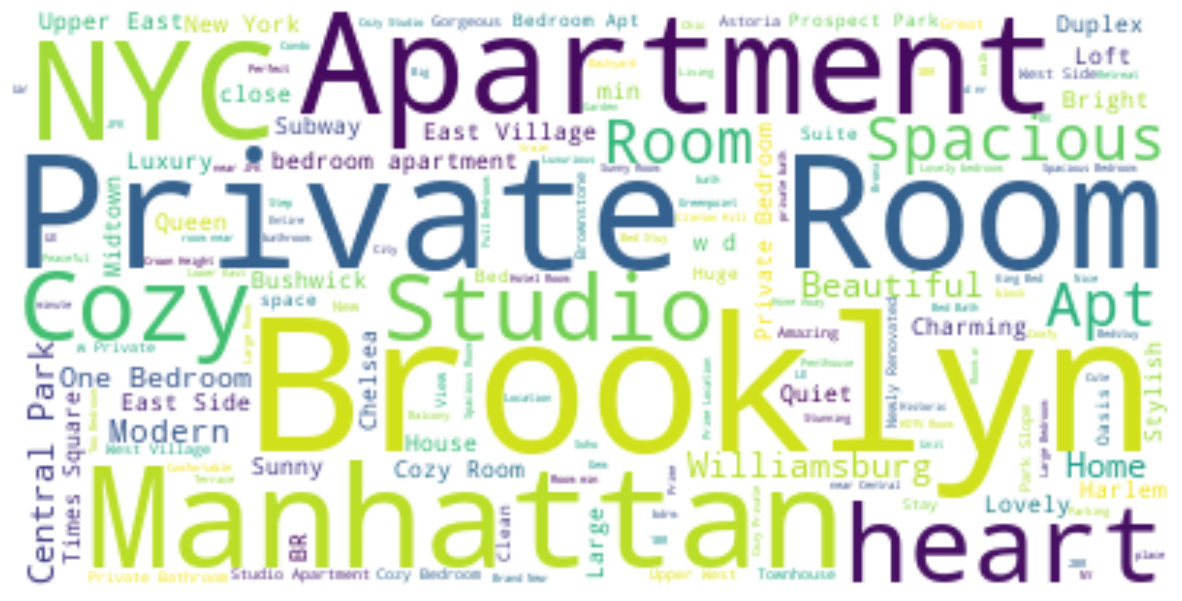

In [22]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(each) for each in data.name)
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

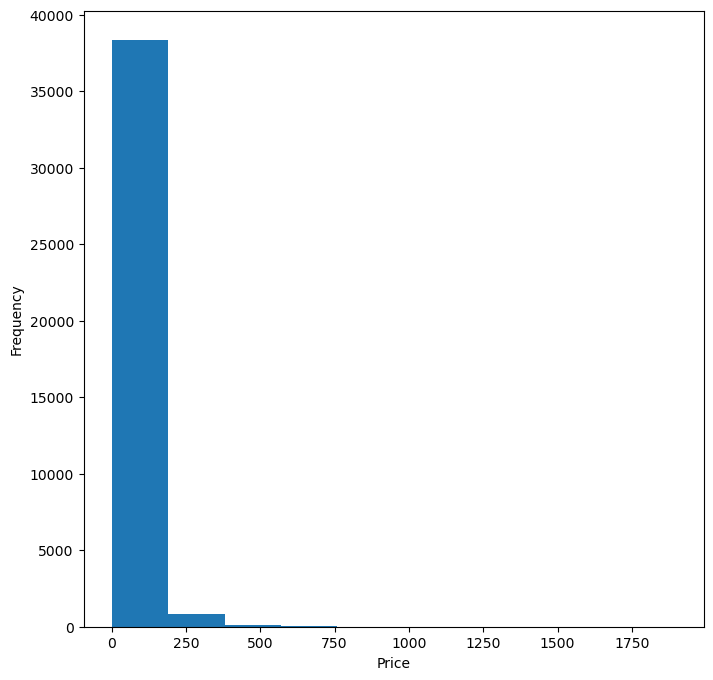

In [23]:
plt.figure(figsize=(8,8))
data['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

C:\Users\ramsh\AppData\Local\Temp\ipykernel_2676\3189191424.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], fit=norm)


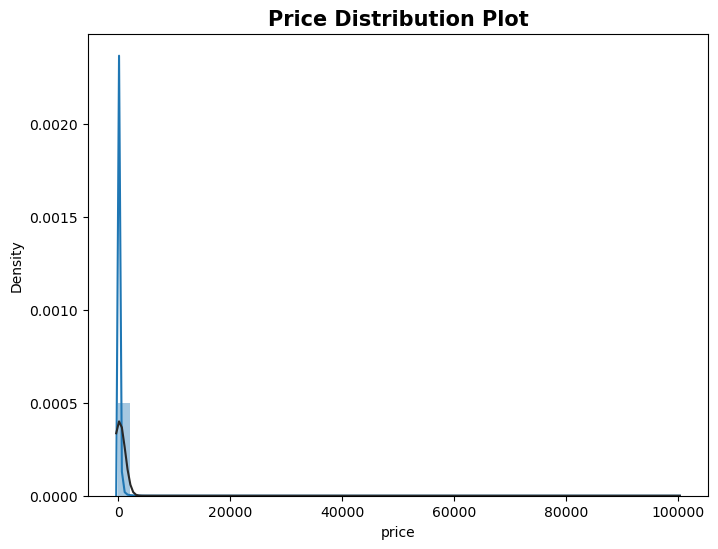

In [24]:
from scipy.stats import norm

plt.figure(figsize=(8,6))
sns.distplot(data['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')
plt.show()

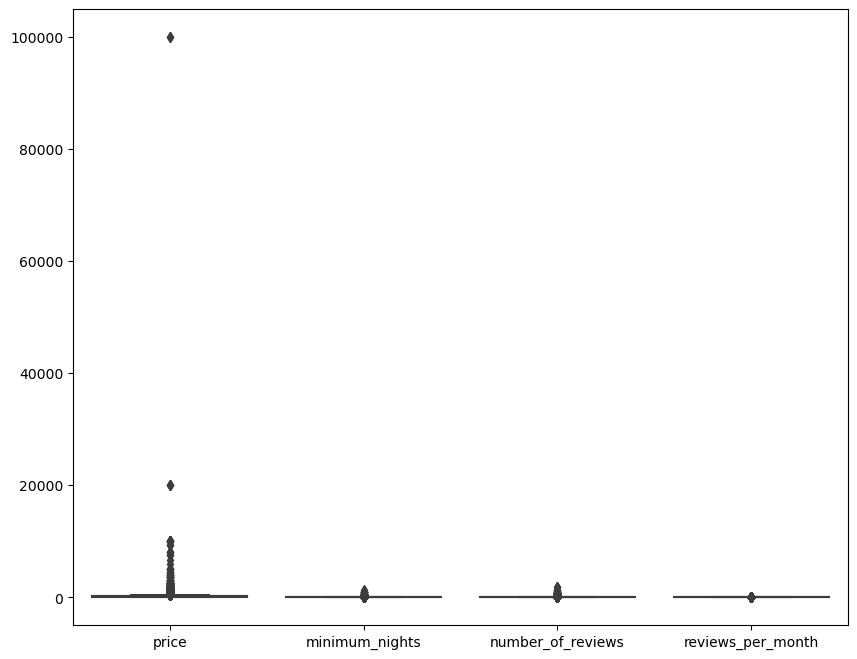

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']])
plt.show()

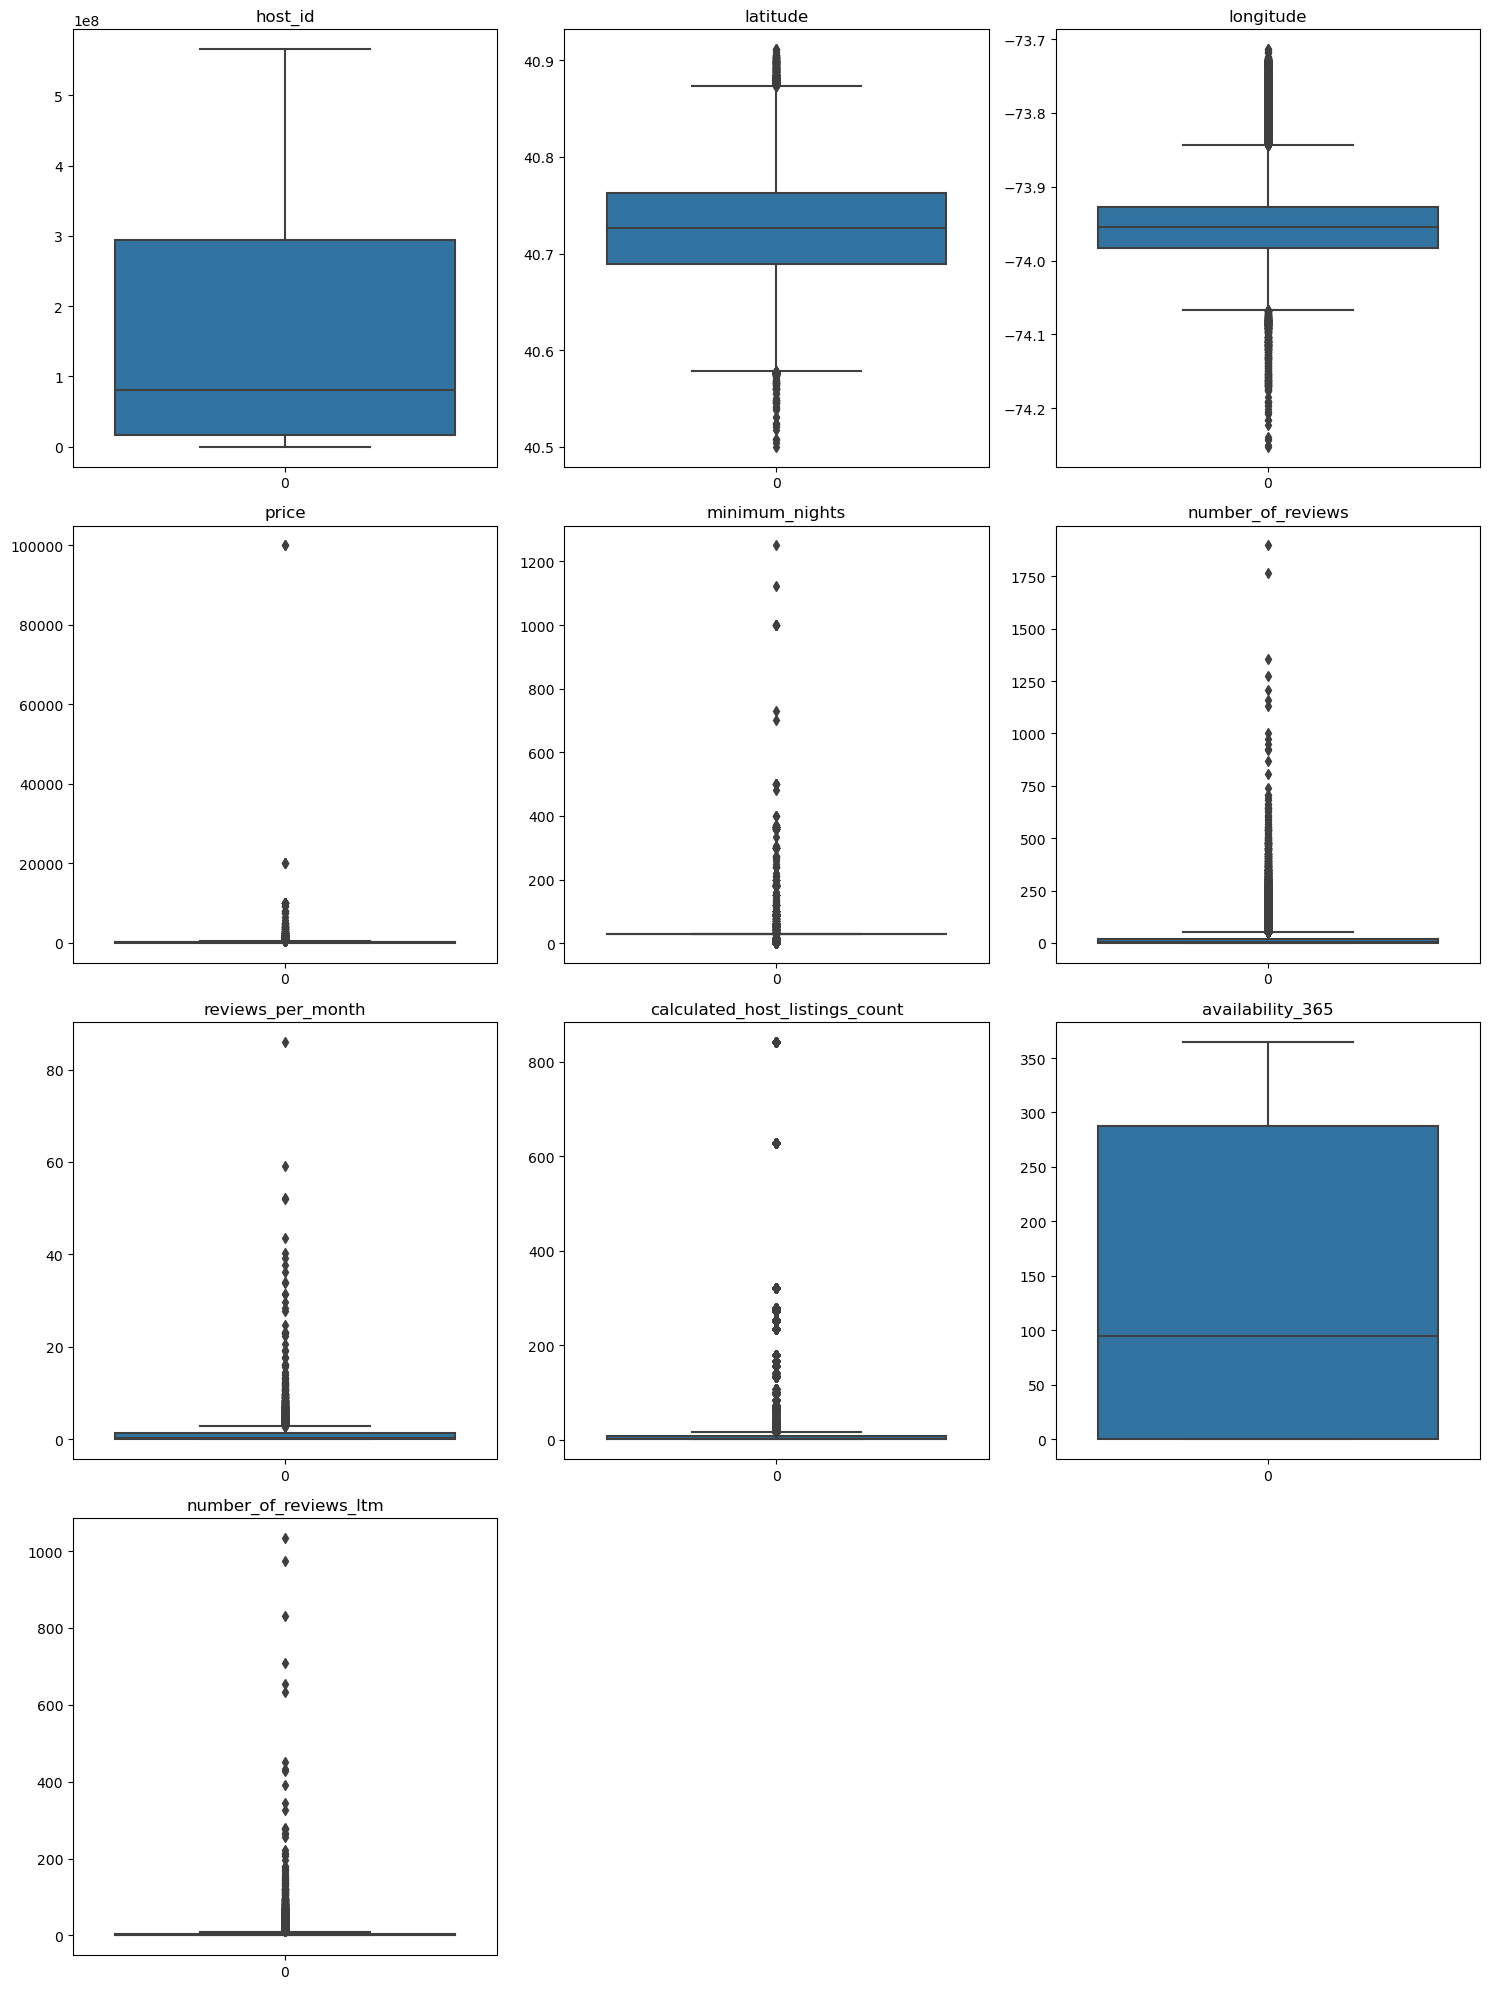

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'id']

num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3) 

plt.figure(figsize=(15, 5*num_rows))  
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()